In [1]:
import pandas as pd # it also has a charting libary ... runs on top of matplotlib
import matplotlib.pyplot as plt # charting library
import seaborn as sns # high level charting library ... runs on top of matplotlib

import numpy as np

# shows the chart in the jupyter notebook
%matplotlib inline 

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5,1,'Histogram of charges')

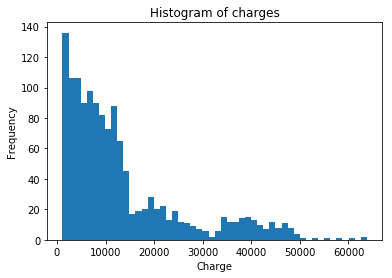

In [4]:
plt.hist(df.charges, bins = 50)
plt.xlabel("Charge")
plt.ylabel("Frequency")
plt.title("Histogram of charges")

Text(0.5,1,'Histogram of charges')

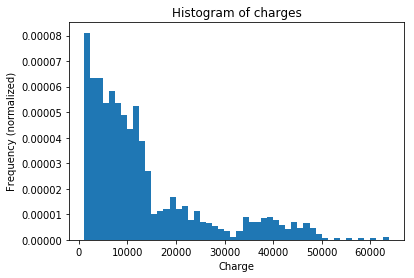

In [5]:
plt.hist(df.charges, bins = 50, density=True)
plt.xlabel("Charge")
plt.ylabel("Frequency (normalized)")
plt.title("Histogram of charges")

Text(0.5,1,'Boxplot of charges')

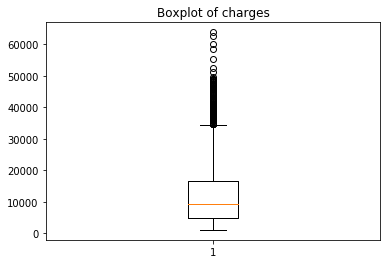

In [6]:
plt.boxplot(df.charges)
plt.title("Boxplot of charges")

In [7]:
a = np.array([5, 10, 4, 9, 100, 12, 13, 20, 25])
np.mean(a), np.std(a), np.median(a)

(22.0, 28.292126898563925, 12.0)

In [8]:

def is_outlier(a):
    q1, q3 = np.percentile(a, [25, 75])
    iqr = q3 - q1
    upper_whisker = min(max(a), q3 + 1.5 * iqr)
    lower_whisker = max(min(a), q1 - 1.5 * iqr)
    print("Outlier boundary: ", (lower_whisker, upper_whisker))

    q1, q3, iqr, upper_whisker, lower_whisker
    return (a > upper_whisker) | (a < lower_whisker)
is_outlier(a)

Outlier boundary:  (4, 36.5)


array([False, False, False, False,  True, False, False, False, False])

In [9]:
a[is_outlier(a)]

Outlier boundary:  (4, 36.5)


array([100])

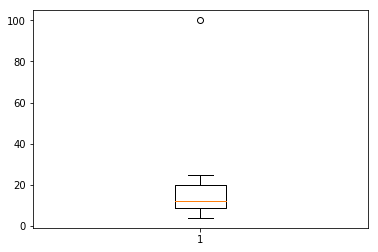

In [10]:
plt.boxplot(a);

In [11]:
sorted(a)

[4, 5, 9, 10, 12, 13, 20, 25, 100]

In [12]:
df.charges[is_outlier(df.charges)].shape

Outlier boundary:  (1121.8739, 34489.350562499996)


(139,)

In [13]:
y = np.log(df.charges)
y[is_outlier(y)].shape

Outlier boundary:  (7.02275569117477, 11.063044851063491)


(0,)

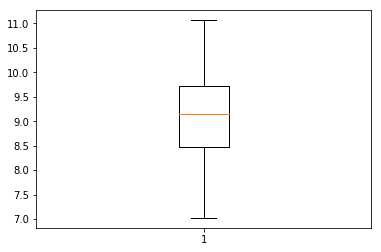

In [14]:
plt.boxplot(y);

In [15]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


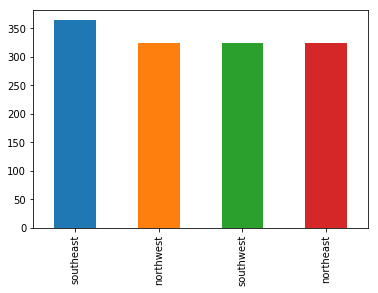

In [16]:
df.region.value_counts().plot.bar()

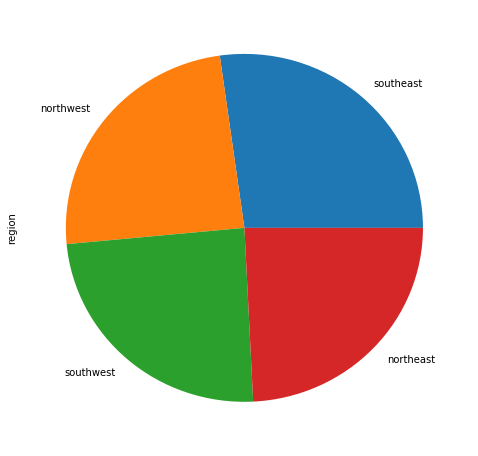

In [17]:
df.region.value_counts().plot.pie(figsize = (8, 8))

# Two variables

Text(0,0.5,'Charge')

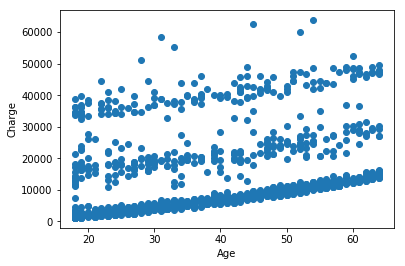

In [18]:
plt.scatter(df.age, df.charges)
plt.xlabel("Age")
plt.ylabel("Charge")

Text(0,0.5,'Charge')

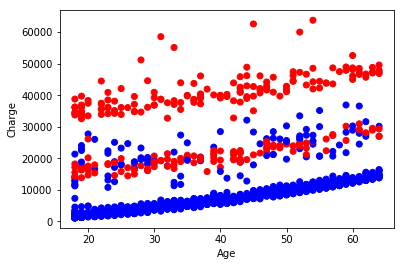

In [19]:
colors = np.where(df.smoker == "yes", "red", "blue")
plt.scatter(df.age, df.charges, color = colors)
plt.xlabel("Age")
plt.ylabel("Charge")


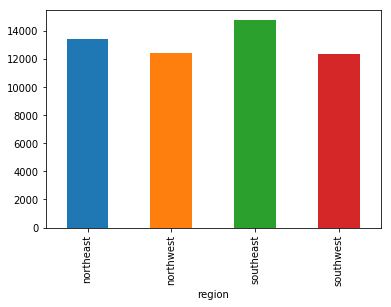

In [20]:
df.groupby("region").charges.mean().plot.bar()

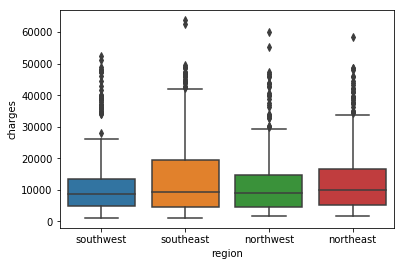

In [21]:
sns.boxplot("region", "charges", data=df)

In [22]:
agg = df.pivot_table("charges", "region", "gender", aggfunc="mean")
agg

gender,female,male
region,,
northeast,12953.203151,13854.005374
northwest,12479.870397,12354.119575
southeast,13499.669243,15879.617173
southwest,11274.411264,13412.883576


In [23]:
agg = df.groupby(["region", "gender"]).age.count().unstack()
agg

gender,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


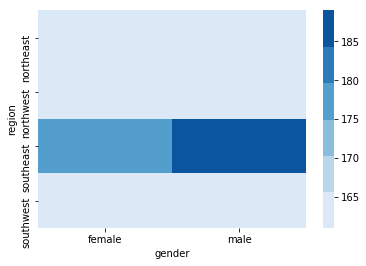

In [24]:
sns.heatmap(agg, cmap = sns.color_palette("Blues"))